In [117]:
import sys
import numpy as np
import pylab
import scipy.stats as stats
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from math import sqrt
from random import uniform

#read data from local data repository
bond = pd.read_csv("D:/UIUC_Course/Machine Learning/Homework03//HY_Universe_corporate bond.csv")
#print(bond.head(5))
#print(bond.tail(5))
print("The size of HY_Universe_corporate bond.csv is" )
bond.shape

The size of HY_Universe_corporate bond.csv is


(2721, 37)

In [118]:
ncol=bond.shape[1]
nrow=bond.shape[0]
print(nrow,ncol)

2721 37


In [88]:
type = [0]*3
colCounts = []

for col in range(ncol):
    for row in range(nrow):
        try:
            a = float(bond.iloc[row,col])
            if isinstance(a, float):
                type[0] += 1
        except ValueError:
            if len(bond.iloc[row,col]) > 0:
                type[1] += 1
            else:
                type[2] += 1
    colCounts.append(type)
    type = [0]*3
sys.stdout.write("Col#" + '\t' + "Number" + '\t' + "Strings" + '\t ' + "Other\n")
iCol = 0
for types in colCounts:
    sys.stdout.write(str(iCol) + '\t' + str(types[0]) + '\t' + str(types[1]) + '\t' + str(types[2]) + '\n')
    iCol += 1
    sys.stdout.write('\n')


Col#	Number	Strings	 Other
0	0	2721	0

1	0	2721	0

2	0	2721	0

3	0	2721	0

4	1757	964	0

5	161	2560	0

6	186	2535	0

7	1170	1551	0

8	41	2680	0

9	2721	0	0

10	2721	0	0

11	0	2721	0

12	0	2721	0

13	2721	0	0

14	0	2721	0

15	2721	0	0

16	2721	0	0

17	2721	0	0

18	2721	0	0

19	0	2721	0

20	2721	0	0

21	2721	0	0

22	2721	0	0

23	2721	0	0

24	2721	0	0

25	2721	0	0

26	2721	0	0

27	2721	0	0

28	2721	0	0

29	2721	0	0

30	2721	0	0

31	2721	0	0

32	2721	0	0

33	2721	0	0

34	2721	0	0

35	2721	0	0

36	2721	0	0



In [119]:
#generate summary statistics for column #9 coupon
CouponPriceData = bond.iloc[:,9]
CouponPriceData=CouponPriceData.astype(float)
CouponMean = CouponPriceData.mean()
CouponStd = CouponPriceData.std()
print("CouponMean: ",CouponMean )
print("CouponStd: ",CouponStd)

CouponMean:  10.307872105843568
CouponStd:  63.05138206542416


In [148]:
#calculate quantile boundaries
percentiles=np.array([25,50,75,100])
percentBdry=np.percentile(CouponPriceData, percentiles)
print("Boundaries for 4 Equal Percentiles of Coupon Payment: ")
print(percentBdry)

Boundaries for 4 Equal Percentiles of Coupon Payment: 
[  5.     6.25   7.75 999.  ]


In [149]:
#run again with 10 equal intervals 
ntiles = 10 
percentBdry = [] 
for i in range(ntiles+1): 
    percentBdry.append(np.percentile(CouponPriceData, i*(100)/ntiles)) 
print("Boundaries for 10 Equal Percentiles of Coupon Payment : ") 
print(percentBdry)

Boundaries for 10 Equal Percentiles of Coupon Payment : 
[0.0, 2.95, 4.63, 5.25, 5.75, 6.25, 6.83, 7.5, 8.13, 9.38, 999.0]


In [128]:
#The column#22 contains categorical variables---coupon type
CouponTypeData=bond.iloc[:,12]
#print(CouponTypeData)
unique = set(CouponTypeData)#unodered set, every elt is unique
catDict = dict(zip(list(unique),range(len(unique))))
#len(unique)
catCount = [0]*len(unique)
for elt in CouponTypeData:
    catCount[catDict[elt]] += 1
print("Counts for Each Type of Coupson: ")
print(list(unique))
print(catCount)

Counts for Each Type of Coupon: 
['STEP CPN', 'VARIABLE', 'PAY-IN-KIND', 'DEFAULTED', 'FLAT TRADING', 'ZERO COUPON', 'FLOATING', 'FIXED', 'EXCHANGED', 'FUNGED']
[4, 111, 41, 184, 7, 7, 124, 2139, 102, 2]


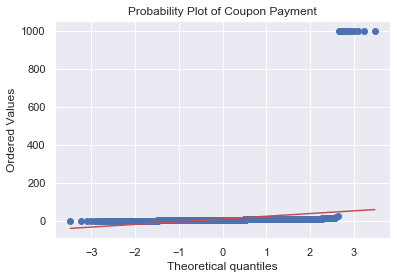

In [153]:
#generate summary statistics for column #9 coupon
stats.probplot(CouponPriceData, dist="norm", plot=pylab)
plt.title("Probability Plot of Coupon Payment")
pylab.show()

In [146]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

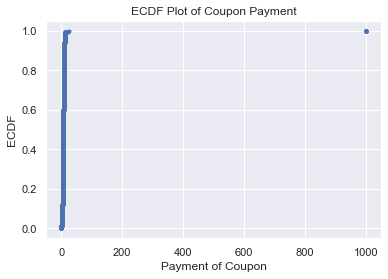

In [154]:
x_vers, y_vers = ecdf(CouponPriceData)

# Generate plot
plt.plot(x_vers,y_vers,marker = '.',linestyle = 'none')

# Label the axes
plt.title("ECDF Plot of Coupon Payment")
plt.xlabel('Payment of Coupon')
plt.ylabel('ECDF')

# Display the plot
plt.show()

In [130]:
#print head and tail of data frame
print(bond.head())
print(bond.tail())


       CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped bond_type  Client_Trade_Percentage weekly_mean_volume  \
0         0.292359    

In [92]:
#print summary of data frame
summary = bond.describe()
print(summary)

            Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4.193546e+05   
min     

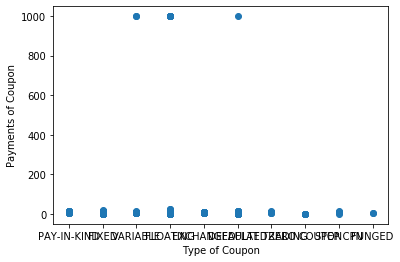

In [131]:
#plot correlations between type of coupon payments
plot.scatter(CouponTypeData,CouponPriceData)
plot.xlabel("Type of Coupon")
plot.ylabel(("Payments of Coupon"))
plot.show()

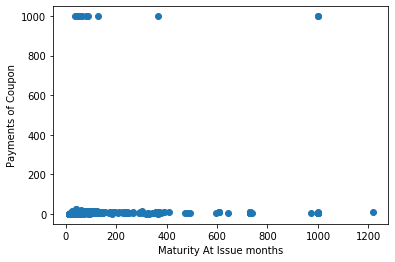

In [132]:
#plot correlations between Maturity of coupon payments
MaturityData=bond.iloc[:,13]
plot.scatter(MaturityData,CouponPriceData)
plot.xlabel("Maturity At Issue months")
plot.ylabel(("Payments of Coupon"))
plot.show()

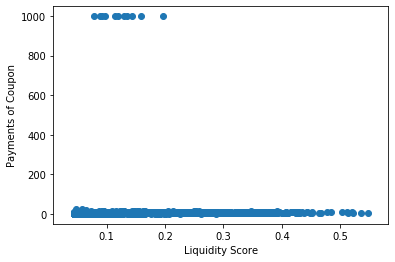

In [133]:
#plot correlations between LiquidityScore and coupon payments
LiquidityScoreData=bond.iloc[:,20]
plot.scatter(LiquidityScoreData,CouponPriceData)
plot.xlabel("Liquidity Score")
plot.ylabel(("Payments of Coupon"))
plot.show()

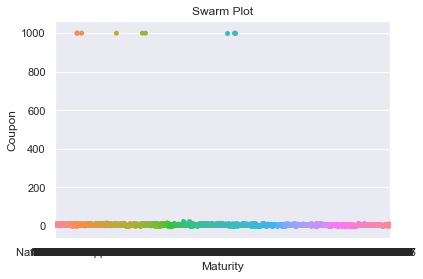

In [145]:
import seaborn as sns
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='Maturity',y='Coupon',data=bond)

# Label the axes
plt.xlabel('Maturity')
plt.ylabel('Coupon')
plt.title('Swarm Plot')
# Show the plot
plt.show()

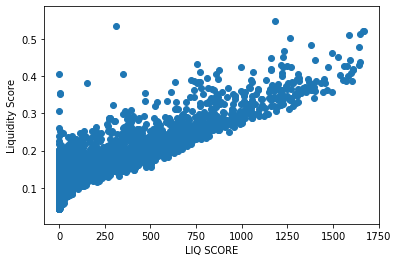

In [134]:
#plot correlations between LIQ and LiquidityScore payments
LIQData=bond.iloc[:,25]
plot.scatter(LIQData,LiquidityScoreData)
plot.xlabel("LIQ SCORE")
plot.ylabel("Liquidity Score")
plot.show()

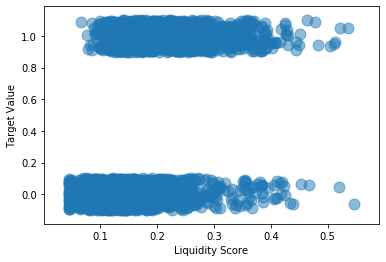

In [135]:
#supposing the IN_ETF is target
ETPdata=bond.iloc[:,19]
target = []
for i in range(nrow):
    if bond.iat[i,19] == "Yes":
        target.append(1.0 + uniform(-0.1, 0.1))
    else:
        target.append(0.0 + uniform(-0.1, 0.1))
plot.scatter(LiquidityScoreData, target, alpha=0.5, s=120)
plot.xlabel("Liquidity Score")
plot.ylabel("Target Value")
plot.show()
    

In [136]:
print("Correlation between LIQ Score and Liquidity Score")
correlate_matrix=np.corrcoef(LIQData,LiquidityScoreData)
print(Correlation_matrix)

Correlation between LIQ Score and Liquidity Score
[[1.20966668e+05 2.39031884e+01]
 [2.39031884e+01 6.19695019e-03]]


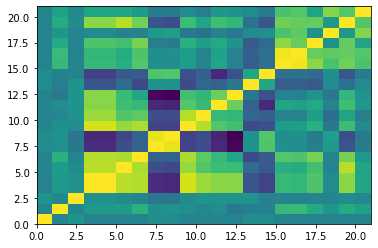

In [115]:
corMat = DataFrame(bond.corr())
plot.pcolor(corMat)
plot.show()

In [155]:
print("My name is Jialing Zhu")
print("My NetID is: jz72")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jialing Zhu
My NetID is: jz72
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
